 <font size='4'><b>Project 4 - Data Analysis </b></font> 

<a href="https://openclassrooms.com/en/" >Openclassrooms</a>, Data Analyst Course
<br>Project 4 by Michael Orange

<hr>

The objective is to analyze the data from a bookstore chain company. 
<br>Historically the company had only brick-and-mortar stores and they decided to open recently an online store. Due to their recommendation engine, their online store is a success. 

[Importing 4 datasets](#import)

**Section 1** - [Overview](#overview)

**Section 2** - [customers](#customers) 
- [Customers - Key overview](#customer_overview)
- [A balanced mix between genders](#gender)
- [4 exceptional customers](#top_customers)
- [Less than 1.5% of customers are not buying again](#retention)
- [An Age-Diverse customer base](#age)
- [50% of sales with 20% customers](#lorenz_cust)
- [Almost no recruitment of net new customers](#recruitment)

**Section 3** - [products](#products)
- [Products - key overview](#prod_overview)
- [Top 100 best selling products](#top100)
- [30% of the products are not sold](#notsold)
- [From 60 up to 80% of the sales are done with 20% of the products](#product_80)
- [A balanced mix in terms of sales among categories](#categ)
- [Lower-priced products in each category are more sold](#lower)


**Section 4** - [transactions](#sales) 
- [Almost no growth to manage](#growth)
- [A predictable business](#stable)
- [Uninterrupted orders 7 days a wek and 24 days a day](#time)

**Section 5** - [Correlations](#correlations) 
- [Men are buying more products from category 1](#c_gender_categ)
- [Correlations with ages](#c_ages)
    - [Preliminary notes about assumptions](#c_notes)
    - [Bivariate Bravais-Pearson Correlation between sales and ages not conclusive](#c_sales_pearson)
    - [Medium Correlation - customers from '31-50' are spending more](#c_sales)
    - [Bivariate Bravais-Pearson Correlation between number of orders and ages not conclusive](#c_order_pearson)
    - [Medium Correlation - customers from '31-50' are ordering more often](#c_order)
    - [Bivariate Bravais-Pearson Correlation between number of products per order and ages not conclusive](#c_prod_pearson)    
    - [Strong correlation - Customers from '31-50' are purchasing more products per order](#c_prod)
    - [Strong correlation - Under 30' customers are buying more expensive products](#c_price)
    - [Medium correlation - Products of the category 2 are purchased by younger customers](#c_ages_categ)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from statistics import stdev 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

<h2>Importing Datasets </h2><a id='import'></a>

- data_transac : transactions details
- data_customers: customers details
- data_prod = products details
- data_orders: orders details

In [2]:
 #import data_transac - data by transactions
data_transac = pd.read_csv("data/output/data_transac.csv")
data_transac['date'] =pd.to_datetime(data_transac['date'])
data_transac

,id_prod,date,session_id,client_id,price,categ,sex,birth,client_age,age_bins
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977.0,45,"(41, 47]"
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0,f,1977.0,45,"(41, 47]"
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0,f,1977.0,45,"(41, 47]"
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0,f,1977.0,45,"(41, 47]"
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0,f,1977.0,45,"(41, 47]"
...,...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1,f,1967.0,55,"(53, 59]"
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1,m,1933.0,89,"(83, 89]"
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0,m,1933.0,89,"(83, 89]"
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0,f,1970.0,52,"(47, 53]"


In [3]:
 #import data_customers - data by customers
data_customers = pd.read_csv("data/output/data_customers.csv")
data_customers['date_first_order'] = pd.to_datetime(data_customers['date_first_order'])
data_customers

,client_id,age_bins,client_age,sex,sales,nb_orders,nb_prod,date_first_order,month_first_order,active_days,active_month,avg_order_value,freq_orders,nb_prod_order
0,c_1,"(65, 71]",67,m,300.65,15,20,2021-06-11 21:02:39.382765,2021-06,262 days 02:57:18.657707000,8.733333,20.043333,1.717557,1.333333
1,c_10,"(65, 71]",66,m,586.18,16,28,2021-03-21 02:50:16.551727,2021-03,344 days 21:09:41.488745000,11.466667,36.636250,1.395349,1.750000
2,c_100,"(29, 35]",30,m,222.87,3,6,2021-04-20 05:26:43.133053,2021-04,314 days 18:33:14.907419000,10.466667,74.290000,0.286624,2.000000
3,c_1000,"(53, 59]",56,f,980.02,42,56,2021-03-13 13:34:14.618755,2021-03,352 days 10:25:43.421717000,11.733333,23.333810,3.579545,1.333333
4,c_1001,"(35, 41]",40,m,1102.45,24,58,2021-03-07 13:01:15.964197,2021-03,358 days 10:58:42.076275000,11.933333,45.935417,2.011173,2.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8616,c_995,"(65, 71]",67,m,119.08,5,8,2021-04-08 02:50:33.499557,2021-04,326 days 21:09:24.540915000,10.866667,23.816000,0.460123,1.600000
8617,c_996,"(47, 53]",52,f,739.60,36,42,2021-03-01 15:06:18.594244,2021-03,364 days 08:53:39.446228000,12.133333,20.544444,2.967033,1.166667
8618,c_997,"(23, 29]",28,f,572.89,10,23,2021-04-30 19:41:32.340325,2021-04,304 days 04:18:25.700147000,10.133333,57.289000,0.986842,2.300000
8619,c_998,"(17, 23]",21,m,1527.69,13,28,2021-03-18 01:32:33.677785,2021-03,347 days 22:27:24.362687000,11.566667,117.514615,1.123919,2.153846


In [4]:
 #import data_prod - data by products
data_prod = pd.read_csv("data/output/data_prod.csv")
data_prod

,id_prod,categ,price,nb_sold,sales
0,0_0,0,3.75,611,2291.25
1,0_1,0,10.99,249,2736.51
2,0_10,0,17.95,12,215.40
3,0_100,0,20.60,2,41.20
4,0_1000,0,6.84,222,1518.48
...,...,...,...,...,...
3282,2_95,2,98.99,3,296.97
3283,2_96,2,47.91,281,13462.71
3284,2_97,2,160.99,5,804.95
3285,2_98,2,149.74,1,149.74


In [5]:
 #import data_orders - data by orders
data_orders = pd.read_csv("data/output/data_orders.csv")
data_orders['date'] =pd.to_datetime(data_orders['date'])
data_orders

,session_id,age_bins,birth,client_age,client_id,date,sex,order_month,order_value
0,s_1,"(53, 59]",1967.0,55,c_329,2021-03-01 00:01:07.843138,f,3,11.99
1,s_10,"(47, 53]",1970.0,52,c_2218,2021-03-01 00:10:33.163037,f,3,26.99
2,s_100,"(41, 47]",1978.0,44,c_3854,2021-03-01 04:12:43.572994,f,3,33.72
3,s_1000,"(29, 35]",1989.0,33,c_1014,2021-03-03 02:49:03.169115,m,3,39.22
4,s_10000,"(29, 35]",1989.0,33,c_476,2021-03-22 18:15:03.831240,f,3,41.49
...,...,...,...,...,...,...,...,...,...
169189,s_99994,"(35, 41]",1983.0,39,c_7685,2021-10-04 18:56:23.112236,m,10,28.92
169190,s_99995,"(59, 65]",1960.0,62,c_4170,2021-10-04 18:35:32.201073,f,10,19.84
169191,s_99996,"(47, 53]",1974.0,48,c_4900,2021-10-04 18:39:10.485474,f,10,56.27
169192,s_99997,"(41, 47]",1979.0,43,c_3521,2021-10-04 18:45:38.003516,f,10,6.99


In [6]:
#styles
col_list_palette_175532 = ["#1eb2a6", "#ffa34d", "#f67575", "#d4f8e8"]
sns.set_palette(col_list_palette_175532)
sns.set_style("darkgrid")

In [7]:
#key variables
total_sales = data_orders.order_value.sum()
total_orders = len(data_orders)
months = np.arange(len(data_orders["date"].dt.to_period('M').unique()))
month_names = sorted(data_orders["date"].dt.to_period('M').unique())
categories = data_prod.categ.unique()

<a id='overview'></a>

<hr>

<h2>Section 1 - Overview</h2>

<h3>Key facts</h3><a id='key_overview'></a>


>Total sales: {{f'{int(total_sales):,}'}}
<br>Total number of orders: {{f'{total_orders:,}'}}

> Number of customers: {{f'{len(data_customers):,}'}}
<br>Number of products in catalog:{{f'{len(data_prod):,}'}} 
<br> Number of products sold: {{f'{len(data_transac):,}'}} 

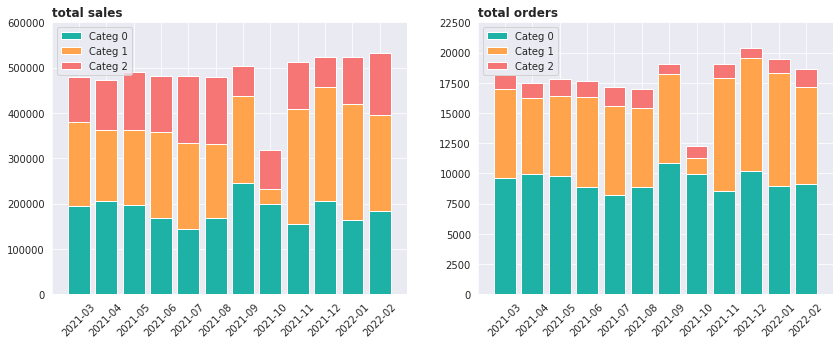

In [8]:
# Total sales and orders
sales_categ_month = [data_transac[data_transac['categ']==k].groupby(data_transac["date"].dt.to_period('M'))['price'].sum() for k in categories]
order_categ_month = [data_transac[data_transac['categ']==k].groupby(data_transac["date"].dt.to_period('M'))['session_id'].nunique() for k in categories]

def bottom_bar(var, val):
        a = 0
        for i in range(val):
            a = np.add(a, var[i]).tolist()
        return a

fig_o1, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))
bar_width = 0.8

[ax1.bar(months, sales_categ_month[k], bottom= bottom_bar(sales_categ_month, k), edgecolor='white', width=bar_width, label='Categ {}'.format(k)) \
 for k in range(3)]     
[ax2.bar(months, order_categ_month[k], bottom= bottom_bar(order_categ_month, k), edgecolor='white', width=bar_width, label='Categ {}'.format(k)) \
 for k in range(3)]   

ax1.set_ylim([0, 600000])
ax1.set_title('total sales', loc='left', weight='bold')
ax2.set_ylim([0, 22500])
ax2.set_title('total orders', loc='left', weight='bold')

for ax in (ax1, ax2):
    ax.legend(loc='best')
    ax.set_xticks(months)
    ax.set_xticklabels(month_names, rotation = 45)
    
plt.savefig('data/output_graphics/fig_o1.png', transparent=True)

In [9]:
sorted(data_transac.loc[(data_transac['categ']==1)&(data_transac["date"].dt.to_period('M') == '2021-10')]['date'].dt.to_period('D').unique())

[Period('2021-10-01', 'D'),
 Period('2021-10-28', 'D'),
 Period('2021-10-29', 'D'),
 Period('2021-10-30', 'D'),
 Period('2021-10-31', 'D')]

**Important** Orders and revenues are dropping significatively in october 2021 - there is zero orders for 26 days from October 2nd to 27th for the category 1.
The bookstore chain is a B2C business and there is an important volume of product references in the category 1 (which exclude the possibility of a shortage of stock for all products of the category 1) so it is probably due to missing data for that period of time.

**It is important to acknowledge that information for the results of the below analysis.**


<a id='customers'></a>

<hr>

<h2>Section 2 - Customers</h2>

In [10]:
data_customers.describe()

,client_age,sales,nb_orders,nb_prod,active_month,avg_order_value,freq_orders,nb_prod_order
count,8621.000000,8621.000000,8621.000000,8621.000000,8600.000000,8600.000000,8600.000000,8600.000000
mean,43.724394,672.498172,19.625797,39.069250,10.995659,40.109052,1.716373,1.983945
std,16.917958,2563.067351,71.760431,156.269538,1.542202,22.643629,5.918124,0.644080
min,18.000000,0.000000,0.000000,0.000000,0.333333,4.150000,0.083565,1.000000
25%,30.000000,274.230000,7.000000,14.000000,10.666667,25.404918,0.701754,1.423951
50%,43.000000,500.140000,13.000000,25.000000,11.566667,31.839702,1.172638,2.000000
75%,56.000000,869.110000,25.000000,47.000000,11.933333,48.329000,2.157813,2.425893
max,93.000000,162007.340000,5501.000000,12855.000000,12.133333,241.160000,453.379121,7.000000


In [11]:
total_customers = len(data_customers)
total_active_customers = len (data_customers.loc[data_customers['sales'] > 0])
total_inactive_customers = total_customers - total_active_customers

mean_age = data_customers.client_age.mean()
avg_order_value = data_customers['avg_order_value'].mean()
avg_frequency_rate = data_customers['freq_orders'].mean()
customer_value = avg_order_value * avg_frequency_rate*12

active_customers_month =  data_orders.groupby(data_orders['date'].dt.to_period('M'))['client_id'].nunique()

customer_churn_list = []
customer_churn= [(active_customers_month[t] - active_customers_month[t+1]) / active_customers_month[t] for t in range(len(months)-1)]
customer_churn_list.append(customer_churn)
mean_customer_churn = np.mean(customer_churn)*100

<h3>Customers - key overview</h3><a id='customer_overview'></a>

>Total number of customers: {{f'{total_customers:,}'}}
<br>Total number of active customers: {{f'{total_active_customers:,}'}}
<br>Total number of inactive customers: {{total_inactive_customers}}

>Average customer age: {{round(mean_age,2)}}
<br>Average order value: {{round(avg_order_value ,2)}}
<br> Average Purchase Frequency Rate (monthly): {{round(avg_frequency_rate, 2)}} per year
<br> Customer value: {{round(customer_value, 2)}} per year
<br>Average customer churn rate: {{round(mean_customer_churn,2)}}%

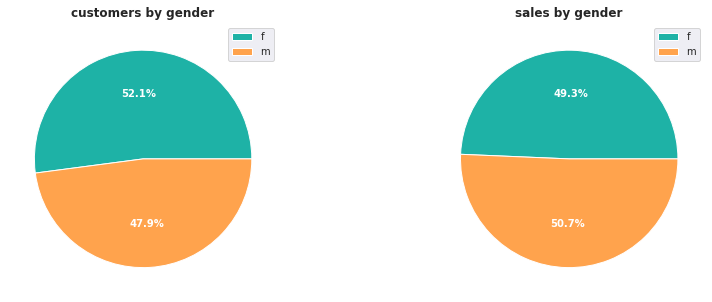

In [12]:
sex_customers = data_customers.groupby('sex')['client_id'].nunique()
sales_sex_customers = data_customers.groupby('sex')['sales'].sum()

fig_c2, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))

ax1.pie(sex_customers, autopct='%1.1f%%', textprops={'fontsize': 10, 'color':'white','weight':'bold'})
ax1.set_title('customers by gender', weight='bold')
ax1.legend(sex_customers.index, loc='best')

ax2.pie(sales_sex_customers, autopct='%1.1f%%', textprops={'fontsize': 10, 'color':'white','weight':'bold'})
ax2.set_title('sales by gender', weight='bold')
ax2.legend(sales_sex_customers.index, loc='best')

plt.savefig('data/output_graphics/fig_c2.png', transparent=True)

<h3>A balanced mix between genders</h3><a id='gender'></a>

There is an equal mix of male and female among customers. There is a small majority of female customers but the difference is too small to be relevant.

> There is match between the customer mix and the sales mix. 

In [13]:
top10_customers = data_customers.loc[data_customers['sales'].isin(data_customers['sales'].nlargest(10))].sort_values(by=\
                                                                                                                     'sales', ascending=False).copy()
top10_customers_sales = top10_customers.sales.sum()
top10_customers_orders = top10_customers.nb_orders.sum()

top4_customers =data_customers.loc[data_customers['sales'].isin(data_customers['sales'].nlargest(4))].sort_values(by='sales', ascending=False).copy()
top4_customers_sales = top4_customers.sales.sum()
top4_customers_orders = top4_customers.nb_orders.sum()

top10_customers

,client_id,age_bins,client_age,sex,sales,nb_orders,nb_prod,date_first_order,month_first_order,active_days,active_month,avg_order_value,freq_orders,nb_prod_order
678,c_1609,"(41, 47]",42,m,162007.34,5501,12855,2021-03-01 00:07:04.371179,2021-03,364 days 23:52:53.669293000,12.133333,29.450525,453.379121,2.336848
4398,c_4958,"(17, 23]",23,m,144257.21,1888,2562,2021-03-01 04:54:48.643575,2021-03,364 days 19:05:09.396897000,12.133333,76.407421,155.604396,1.356992
6350,c_6714,"(53, 59]",54,f,73217.32,1286,4473,2021-03-01 06:44:06.269773,2021-03,364 days 17:15:51.770699000,12.133333,56.934152,105.989011,3.478227
2728,c_3454,"(47, 53]",53,m,54462.90,2711,3275,2021-03-01 01:08:49.803921,2021-03,364 days 22:51:08.236551000,12.133333,20.089598,223.434066,1.208041
7732,c_7959,"(47, 53]",48,f,2564.25,76,195,2021-03-03 16:23:08.988869,2021-03,362 days 07:36:49.051603000,12.066667,33.740132,6.298343,2.565789
7808,c_8026,"(41, 47]",44,m,2547.66,77,193,2021-03-05 01:46:06.776568,2021-03,360 days 22:13:51.263904000,12.000000,33.086494,6.416667,2.506494
3880,c_4491,"(35, 41]",38,f,2540.53,73,168,2021-03-03 20:11:16.313438,2021-03,362 days 03:48:41.727034000,12.066667,34.801781,6.049724,2.301370
1269,c_2140,"(41, 47]",45,f,2527.01,74,195,2021-03-17 09:49:03.407913,2021-03,348 days 14:10:54.632559000,11.600000,34.148784,6.379310,2.635135
8214,c_8392,"(41, 47]",44,f,2515.98,79,189,2021-03-05 03:10:48.334957,2021-03,360 days 20:49:09.705515000,12.000000,31.847848,6.583333,2.392405
7136,c_7421,"(41, 47]",44,m,2511.98,77,189,2021-03-02 10:56:00.013198,2021-03,363 days 13:03:58.027274000,12.100000,32.623117,6.363636,2.454545


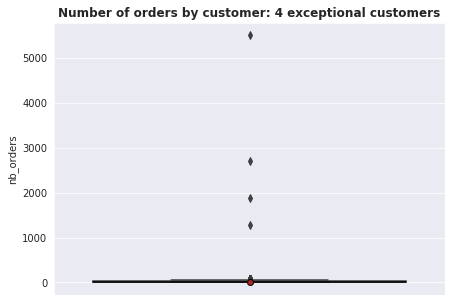

In [14]:
fig_c1, ax = plt.subplots(1,1, figsize = (7,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
             
sns.boxplot(y='nb_orders', data= data_customers, showmeans=True, meanprops=meanprops, \
            medianprops=medianprops, ax=ax)
ax.set_title('Number of orders by customer: 4 exceptional customers', weight = 'bold')

plt.savefig('data/output_graphics/fig_c1.png', transparent=True)

<h3>4 exceptional customers</h3><a id='top_customers'></a>


**Top 10 customers**
<br>customers: {{top10_customers['client_id'].tolist()}}
>Sales: {{f'{int(top10_customers_sales):,}'}} ({{round(top10_customers_sales/total_sales *100,2)}}% of the total)
<br>Orders: {{f'{int(top10_customers_orders):,}'}} ({{round(top10_customers_orders /total_orders *100,2)}}% of the total)
<br>Average order value: {{round(top10_customers.avg_order_value.mean(),2)}}
<br> Average Purchase Frequency Rate: {{round(top10_customers_orders /len(top10_customers), 2)}} per year
<br>Average age: {{round(top10_customers.client_age.mean(),2)}}

 **Top 4 customers**
 <br>customers: {{top4_customers['client_id'].tolist()}}
>Sales: {{f'{int(top4_customers_sales):,}'}} ({{round(top4_customers_sales/total_sales *100,2)}}% of the total)
<br>Orders: {{f'{int(top4_customers_orders):,}'}} ({{round(top4_customers_orders  /total_orders *100,2)}}% of the total)
<br>Average order value: {{round(top4_customers.avg_order_value.mean(),2)}}
<br> Average Purchase Frequency Rate: {{round(top4_customers_orders /len(top4_customers), 2)}} per year
<br>Average age: {{round(top4_customers.client_age.mean(),2)}}

Due to the high level of orders (1000+ orders a year), these 4 top customers might be local communities (ex. schools, nursing homes libraries) rather than individuals. 

In [15]:
inactive_customers =data_customers.loc[data_customers['sales'] == 0].sort_values(by='sales', ascending=False)
one_order_customers =data_customers.loc[data_customers['nb_orders'] == 1].sort_values(by='sales', ascending=False)

<h3>Less than 1.5% of customers are not buying again</h3><a id='retention'></a>

**Inactive customers (no orders)**
<br>customers: {{inactive_customers['client_id'].tolist()}}
>Number of inactive customers: {{len(inactive_customers)}} ({{round((len(inactive_customers)/total_customers)*100,2)}} % of the total)

**customers with only 1 order**
>Number of customers with only 1 order: {{len(one_order_customers)}} ({{round((len(one_order_customers)/total_customers)*100,2)}} % of the total)
<br>Average order value: {{round(one_order_customers.avg_order_value.mean(),2)}}
<br>Average age: {{round(one_order_customers.client_age.mean(),2)}}

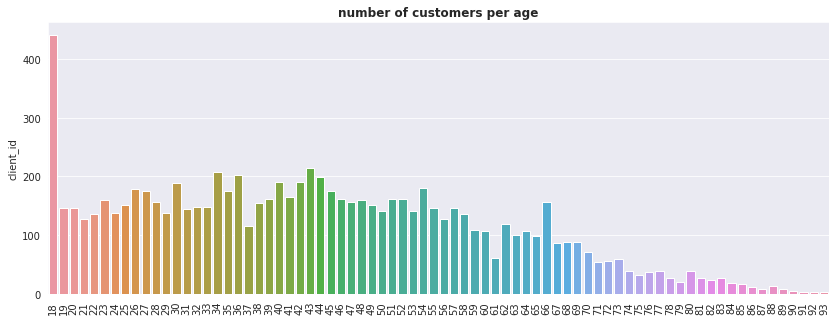

In [16]:
age_bins_sorted = sorted(data_customers.age_bins.unique())
age_sorted= sorted(data_customers.client_age.unique())

fig_c3, ax2 = plt.subplots(1,1, figsize = (14,5))

#sns.barplot(age_bins_sorted, data_customers.groupby('age_bins')['client_id'].nunique(), ax=ax1)
#ax1.set_title("customers by group of ages", weight = 'bold')
#ax1.set_xticklabels(age_bins_sorted, rotation = 45)

sns.barplot(age_sorted, data_customers.groupby('client_age')['client_id'].nunique(), ax=ax2)
ax2.set_title("number of customers per age", weight = 'bold')
ax2.set_xticklabels(age_sorted, rotation = 90)

plt.savefig('data/output_graphics/fig_c3.png', transparent=True)

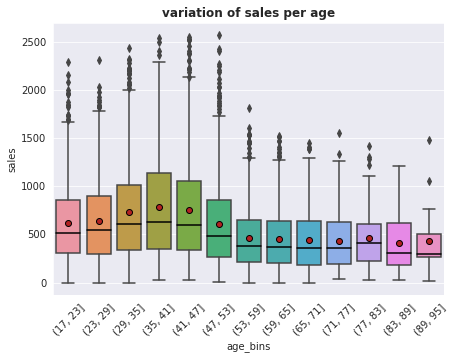

In [17]:
fig_c4, ax1 = plt.subplots(1,1, figsize = (7,5))

data_customers.sort_values(by='age_bins', inplace=True)
X = data_customers.loc[(~data_customers.client_id.isin(top4_customers.client_id)) & (data_customers.client_age != 18)]['age_bins']
Y = data_customers.loc[(~data_customers.client_id.isin(top4_customers.client_id)) & (data_customers.client_age != 18)]['sales']


medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
sns.boxplot(X, Y, showmeans=True, meanprops=meanprops, medianprops=medianprops, ax=ax1);
ax1.set_title("variation of sales per age", weight = 'bold')
ax1.set_xticklabels(age_bins_sorted, rotation = 45)


plt.savefig('data/output_graphics/fig_c4.png', transparent=True)

<h3>An Age-Diverse customer base</h3><a id='age'></a>

- Customers are aged between {{int(data_customers.client_age.min())}} and {{int(data_customers.client_age.max())}} years.
- Age mean is: {{round(data_customers.client_age.mean(),2)}} years
- Age median is: {{round(data_customers.client_age.median(),2)}} years
- Standard deviation is : {{round(stdev(data_customers.client_age),2)}}
- 68.2% of the customers are aged between {{round(data_customers.client_age.mean()-stdev(data_customers.client_age),2)}} and {{round(data_customers.client_age.mean()+stdev(data_customers.client_age),2)}} years

Note: there is a significant proportion of customers with an age of 18 years old and there is no customer under 18 years old. 18 is probably the minimum age or the age by default in the system and any purchase by individuals under 18 could be flagged '18', or from customers who didnt change the default age.

> In terms of sales per age, there is a stronger concentration on the ages below 47. The customer value of these customers is higher, escpecially for the customers in the range of 36-47 years old.

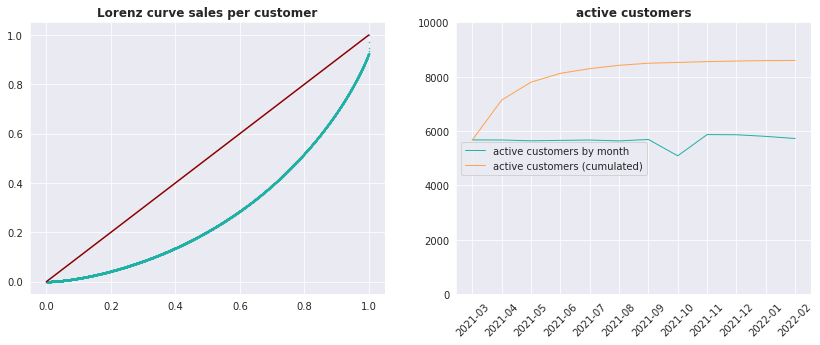

In [18]:
fig_c5, (ax1, ax2) = plt.subplots(1,2, figsize = (14, 5))

def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    return X_lorenz
  
def gini(X):
    AUC = (lorenz_curve(X).sum() - lorenz_curve(X)[-1]/2 - lorenz_curve(X)[0]/2)/ len(X)
    S = 0.5 - AUC
    gini = 2* S
    return gini

sales_customer_sorted = data_customers.sales.sort_values(ascending=True)
lorenz = lorenz_curve(sales_customer_sorted.values)
x = np.arange(len(lorenz))/(len(lorenz)-1)

ax1.scatter(x, lorenz, marker='.', s=1)
ax1.set_title("Lorenz curve sales per customer", weight = 'bold')
ax1.plot([0,1], [0,1], color = '#8B0000')

gini_customers = gini(lorenz)

total_active_customer =  data_customers.groupby(data_customers['month_first_order'])['client_id'].nunique().cumsum()

ax2.plot(months, active_customers_month, linewidth=1)
ax2.plot(months, total_active_customer, linewidth=1)
ax2.set_title('active customers', weight='bold')
ax2.set_xticks(months)
ax2.set_xticklabels(month_names, rotation = 45)
ax2.set_ylim(0, 10000)
ax2.legend(['active customers by month', 'active customers (cumulated)'], loc='center left')

plt.savefig('data/output_graphics/fig_c5.png', transparent=True)

<h3>50% of the sales are done with 20% of the customers</h3><a id='lorenz_cust'></a>

>Only 4 customers are doing 7.5% of the sales.
<br>On the other side, 50% of the customers are doing only 20% of the sales.

In [19]:
# new customers last 6 months:
customers_h1 = data_customers.loc[data_customers.month_first_order < '2021-09']['client_id']
customers_h2 =data_customers.loc[data_customers.month_first_order >= '2021-09']['client_id']
s = set(customers_h1)
new_customers_h2 = [x for x in customers_h2 if x not in customers_h1]
new_cust_h2_per_cent = len(new_customers_h2)/total_customers *100

<h3>Almost no recruitment of net new customers</h3><a id='recruitment'></a>

> The recruitement is severely low with only {{len(new_customers_h2)}} net new customers in H2 (from 2021-09 to 2022-10) - **this is only {{round(new_cust_h2_per_cent,2)}}% of new customers recruited in H2.**

<a id='products'></a>

<hr>

<h2>Section 3 - Products</h2>

In [20]:
data_prod

,id_prod,categ,price,nb_sold,sales
0,0_0,0,3.75,611,2291.25
1,0_1,0,10.99,249,2736.51
2,0_10,0,17.95,12,215.40
3,0_100,0,20.60,2,41.20
4,0_1000,0,6.84,222,1518.48
...,...,...,...,...,...
3282,2_95,2,98.99,3,296.97
3283,2_96,2,47.91,281,13462.71
3284,2_97,2,160.99,5,804.95
3285,2_98,2,149.74,1,149.74


In [21]:
total_prod = len(data_prod)
total_active_prod = len (data_prod.loc[data_prod['sales'] > 0])
total_inactive_prod = total_prod - total_active_prod

total_nb_sold = data_prod.nb_sold.sum()
mean_price_inventory = data_prod.price.mean()
avg_product_sales = total_sales / total_nb_sold

avg_revenue_prod = total_sales / total_prod

active_products_month =  data_transac.groupby(data_transac['date'].dt.to_period('M'))['id_prod'].nunique()

dict_prod_categ = {'categ0': data_prod.loc[data_prod['categ']==0].id_prod.nunique(), \
        'categ1': data_prod.loc[data_prod['categ']==1].id_prod.nunique(), \
        'categ2': data_prod.loc[data_prod['categ']==2].id_prod.nunique()}

<h3>products - key overview</h3><a id='prod_overview'></a>
    
>Total number of products: {{f'{total_prod:,}'}}
<br>Number of unique products sold: {{f'{total_active_prod:,}'}}
<br>Total number of unique products not sold during the year: {{total_inactive_prod}}

>Number of products sold: {{f'{total_nb_sold:,}'}}
<br>Average price of products in the inventory: {{round(mean_price_inventory,2)}}
<br> Average price of products sold : {{round(avg_product_sales, 2)}} per year

> {{dict_prod_categ['categ0']}} from category 0 
<br>{{dict_prod_categ['categ1']}} from category 1
<br>{{dict_prod_categ['categ2']}} from category 2

>Average Revenue per product:{{f'{int(avg_revenue_prod):,}'}}

In [22]:
data_prod.describe()

,categ,price,nb_sold,sales
count,3287.000000,3287.000000,3287.000000,3287.000000
mean,0.370246,21.859985,102.469121,1763.798826
std,0.615387,29.845962,162.887852,3500.014466
min,0.000000,0.620000,0.000000,0.000000
25%,0.000000,6.990000,8.000000,113.955000
50%,0.000000,13.060000,28.000000,394.210000
75%,1.000000,22.990000,118.000000,1668.025000
max,2.000000,300.000000,1081.000000,33874.090000


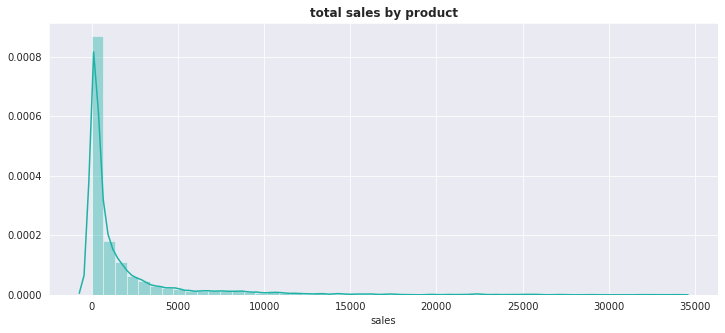

In [23]:
fig_p1, ax = plt.subplots(1,1, figsize = (12,5))
sns.distplot(data_prod.sales, ax=ax)
ax.set_title("total sales by product", weight = 'bold')
ax.set_xlabel('sales')
plt.savefig('data/output_graphics/fig_p1.png', transparent=True)

> While the total sales of a lot of products are very low, the total sales of a small quantity of products are very high.

In [24]:
top100_prod = data_prod.loc[data_prod['sales'].isin(data_prod['sales'].nlargest(100))].sort_values(by='sales', ascending=False)
top100_prod_sales = top100_prod.sales.sum()
top100_prod_nb_sold = top100_prod.nb_sold.sum()

top100_avg_prod_price = top100_prod_sales / top100_prod_nb_sold
top100_avg_revenue_prod = top100_prod_sales / len(top100_prod)

dict_top100_prod_categ = {'categ0': top100_prod.loc[top100_prod['categ']==0].id_prod.nunique(), \
        'categ1': top100_prod.loc[top100_prod['categ']==1].id_prod.nunique(), \
        'categ2': top100_prod.loc[top100_prod['categ']==2].id_prod.nunique()}

<h3>Top 100 best selling products are key</h3><a id='top100'></a>

- Number of products: {{len(top100_prod)}}  ({{ round(len(top100_prod)/total_prod*100,2) }}% of the total)
- Sales: {{f'{int(top100_prod_sales):,}'}} ({{round(top100_prod_sales/total_sales *100,2)}}% of the total)
- Average price: {{round(top100_avg_prod_price ,2)}}
- Average Revenue by product: {{int(top100_avg_revenue_prod)}}
- {{dict_top100_prod_categ['categ0']}} from category 0 -- {{dict_top100_prod_categ['categ1']}} from category 1 -- {{dict_top100_prod_categ['categ2']}} from category 2.

>**The top 100 best-selling products (3% of products) are representing alone {{int(top100_prod_sales/total_sales*100)}}% of the sales**

In [25]:
inactive_prod =data_prod.loc[data_prod['sales'] == 0].sort_values(by='sales', ascending=False)
dict_inactive_prod_categ = {'categ0': inactive_prod.loc[inactive_prod['categ']==0].id_prod.nunique(), \
        'categ1': inactive_prod.loc[inactive_prod['categ']==1].id_prod.nunique(), \
        'categ2': inactive_prod.loc[inactive_prod['categ']==2].id_prod.nunique()}

underperf_prod =data_prod.loc[data_prod['nb_sold'] < 11].sort_values(by='sales', ascending=False)
underperf_prod_sales = underperf_prod.sales.sum()
underperf_prod_price = underperf_prod.sales.sum() / underperf_prod.nb_sold.sum()
underperf_revenue_prod = underperf_prod_sales / len(underperf_prod)
dict_underperf_prod_categ = {'categ0': underperf_prod.loc[underperf_prod['categ']==0].id_prod.nunique(), \
        'categ1': underperf_prod.loc[underperf_prod['categ']==1].id_prod.nunique(), \
        'categ2': underperf_prod.loc[underperf_prod['categ']==2].id_prod.nunique()}

<h3>30% of the products are almost not sold</h3><a id='notsold'></a>

**Inactive customers (no orders)**
<br>products with zero sales: {{inactive_prod['id_prod'].tolist()}}

- Number of inactive customers: {{len(inactive_prod)}} ({{round((len(inactive_prod)/total_prod)*100,2)}} % of the total)
- {{dict_inactive_prod_categ['categ0']}} from category 0 -- {{dict_inactive_prod_categ['categ1']}} from category 1 -- {{dict_inactive_prod_categ['categ2']}} from category 2.

**products with 10 or less quantity ordered**
- Number of products: {{len(underperf_prod )}}  ({{ round(len(underperf_prod)/total_prod*100,2) }}% of the total)
- Sales: {{int(underperf_prod_sales)}} ({{ round(underperf_prod_sales/total_sales*100,2) }}% of the total)
- Average price: {{round(underperf_prod_price ,2)}}
- Average Revenue by product: {{int(underperf_revenue_prod )}}
- {{dict_underperf_prod_categ['categ0']}} from category 0 -- {{dict_underperf_prod_categ['categ1']}} from category 1 -- {{dict_underperf_prod_categ['categ2']}} from category 2.

>**30% of the products in the catalog are representing less than 3% of the total sales.**

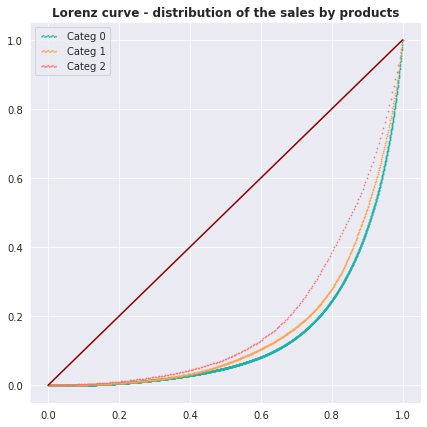

In [26]:
fig_p2, ax1 = plt.subplots(1,1, figsize = (7, 7))

for k in data_prod.categ.unique(): 
    sales_prod_sorted = data_prod.loc[data_prod['categ']==k].sales.sort_values(ascending=True)
    lorenz = lorenz_curve(sales_prod_sorted.values)
    x = np.arange(len(lorenz))/(len(lorenz)-1)
    ax1.scatter(x, lorenz, marker='.', s=2, label='Categ {}'.format(k))
    ax1.legend(scatterpoints=10)
ax1.set_title("Lorenz curve - distribution of the sales by products", weight='bold')
ax1.plot([0,1], [0,1], color = '#8B0000')

plt.savefig('data/output_graphics/fig_p2.png', transparent=True)

<h3>From 60 up to 80% of the sales are done with 20% of products</h3><a id='product_80'></a>

>**Category 0:** Approx. 80% of the sales in that category are done with 20% of the products.
<br>**Category 1:** Approx. 70% of the sales in that category are done with 20% of the products.
<br>**Category 2:** Approx. 60% of the sales in that category are done with 20% of the products.

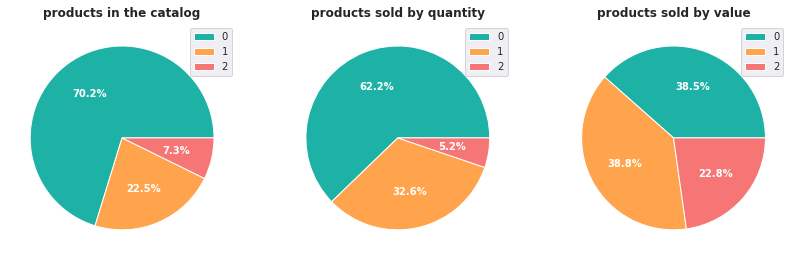

In [27]:
mix_categories_catalog = data_prod.groupby('categ')['id_prod'].nunique()
mix_categories_nbsold = data_prod.groupby('categ')['nb_sold'].sum()
mix_categories_sales = data_prod.groupby('categ')['sales'].sum()

figp_p3, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14,5))

ax1.pie(mix_categories_catalog, autopct='%1.1f%%', textprops={'fontsize': 10, 'color':'white','weight':'bold'})
ax1.set_title('products in the catalog', weight='bold')
ax1.legend(mix_categories_catalog.index, loc='best')

ax2.pie(mix_categories_nbsold, autopct='%1.1f%%', textprops={'fontsize': 10, 'color':'white','weight':'bold'})
ax2.set_title('products sold by quantity', weight='bold')
ax2.legend(mix_categories_sales.index, loc='upper right')

ax3.pie(mix_categories_sales, autopct='%1.1f%%', textprops={'fontsize': 10, 'color':'white','weight':'bold'})
ax3.set_title('products sold by value', weight='bold')
ax3.legend(mix_categories_sales.index, loc='upper right')

plt.savefig('data/output_graphics/fig_p3.png', transparent=True)

<h3>Categories: a balanced mix in terms of sales </h3><a id='categ'></a>

- The majority of products in the catalog are from the category 0 | {{mix_categories_catalog[0]}} products in catalog and {{mix_categories_nbsold[0]}} units sold. 
- The category 1 is balanced and close to 1/3 in proportion | {{mix_categories_catalog[1]}} products in catalog and {{mix_categories_nbsold[1]}} units sold. 
- The category 2 is quite small (qty) in comparaison of the 2 other categories | {{mix_categories_catalog[2]}} products in catalog and {{mix_categories_nbsold[2]}} units sold.

>**Unlike the quantities, we have a balanced split between the 3 categories in terms of revenues** due to price range differences between categories. 

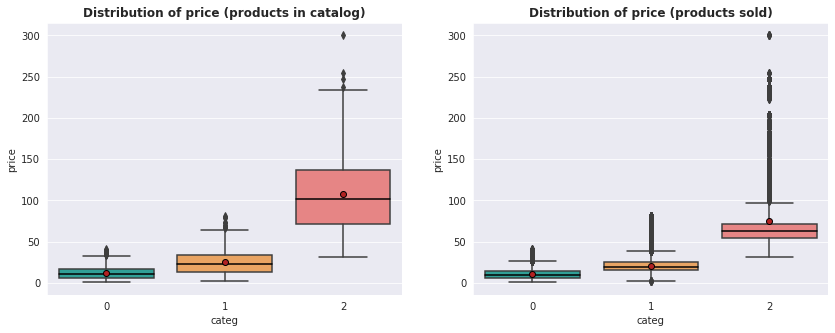

In [28]:
fig_p4, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
             
# products in catalog             
sns.boxplot(x='categ',y='price', data= data_prod, showmeans=True, meanprops=meanprops, medianprops=medianprops, ax=ax1)
ax1.set_title('Distribution of price (products in catalog)', weight = 'bold')

#products sold
sns.boxplot(x='categ',y='price', data= data_transac, showmeans=True, meanprops=meanprops, medianprops=medianprops, ax=ax2)
ax2.set_title('Distribution of price (products sold)', weight = 'bold')

mean_categ_catalog = [data_prod[data_prod['categ']==k]['price'].mean() for k in data_prod.categ.unique()]
std_categ_catalog = [data_prod[data_prod['categ']==k]['price'].std() for k in data_prod.categ.unique()]

mean_categ = [data_transac[data_transac['categ']==k]['price'].mean() for k in data_prod.categ.unique()]
std_categ = [data_transac[data_transac['categ']==k]['price'].std() for k in data_prod.categ.unique()]

plt.savefig('data/output_graphics/fig_p4.png', transparent=True)

<h3>Lower-priced products in each category are more sold</h3><a id='lower'></a>

The 3 categories of products in catalog have distinct range of prices: 
- Category 0 (catalog): average price is {{round(mean_categ_catalog[0],2)}} with a standard deviation of {{round(std_categ_catalog[0],2)}}
- Category 1 (catalog): average price is {{round(mean_categ_catalog[1],2)}} with a standard deviation of {{round(std_categ_catalog[1],2)}}
- Category 2 (catalog): average price is {{round(mean_categ_catalog[2],2)}} with a standard deviation of {{round(std_categ_catalog[2],2)}}

>There is a wider distribution for the category 2 with a larger range of prices.

- Category 0 (sales): mean is {{round(mean_categ[0],2)}} with a standard deviation of {{round(std_categ[0],2)}}
- Category 1 (sales): mean is {{round(mean_categ[1],2)}} with a standard deviation of {{round(std_categ[1],2)}}
- Category 2 (sales): mean is {{round(mean_categ[2],2)}} with a standard deviation of {{round(std_categ[2],2)}}

>There is a change on price distribution (for category 2 and especially category 3) if we consider the product actual sales. 
<br>Both inner-quartile range and upper-quartile range are significantly reduced (with lower means): **the higher-price products of the catalog have lower volume of sales**.

<a id='transactions'></a>

<hr>

<h2>Section 4 - Transactions</h2>

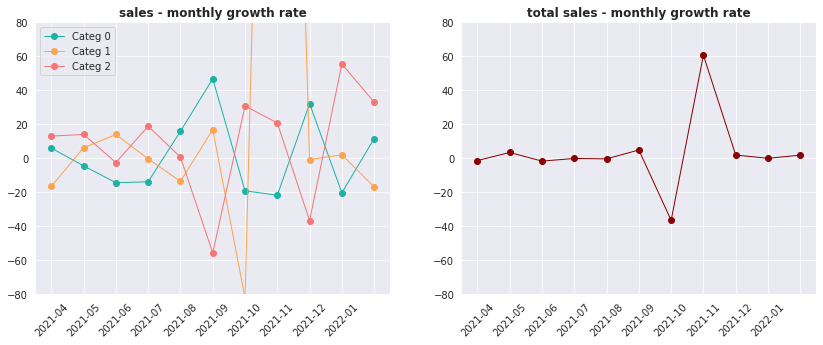

In [29]:
sales_categ_month = [data_transac[data_transac['categ']==k].groupby(data_transac["date"].dt.to_period('M'))['price'].sum() for k in categories]
sales_month = data_transac.groupby(data_transac["date"].dt.to_period('M'))['price'].sum()

sales_growth_month_dict={}
for k in categories: 
    growth_month_list=[]
    total_growth_month_list=[]
    for i in range(11): 
        growth_month = (sales_categ_month[int(k)][i+1] - sales_categ_month[int(k)][i])/(sales_categ_month[int(k)][i])*100
        growth_month_list.append(growth_month)
        sales_growth_month_dict[k] = growth_month_list
        # total
        total_growth_month = (sales_month[i+1] - sales_month[i])/(sales_month[i])*100
        total_growth_month_list.append(total_growth_month)
        

fig_t1, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))

[ax1.plot(list(range(11)), sales_growth_month_dict[k], linewidth=1, marker="o", label='Categ {}'.format(k)) for k in categories]     
ax1.set_title('sales - monthly growth rate', weight='bold')
ax1.legend()

ax2.plot(list(range(11)), total_growth_month_list, linewidth=1, marker="o",color = '#8B0000')    
ax2.set_title('total sales - monthly growth rate', weight='bold')


for ax in (ax1, ax2):
    ax.set_xticks(list(range(11)))
    ax.set_xticklabels(month_names[1:-1], rotation = 45)
    ax.set_ylim(-80, 80)


plt.savefig('data/output_graphics/fig_t1.png', transparent=True)

In [30]:
#exclude values in category 1 for october and november - not relevant due to the lack of data in October
del sales_growth_month_dict[1][6:8]
del total_growth_month_list[6:8]

#corrected mean of each category (excl. oct and november in category 1)
mean_sales_growth_categ = [np.mean(sales_growth_month_dict[k]) for k in categories]

#corrected mean of total sales (excl. oct and november in category 1)
mean_sales_growth_total = np.mean(total_growth_month_list)

<h3>Almost no growth to manage</h3><a id='growth'></a>

Below results excludes in the category 1 the 2 months impacted by the [missing data](#missing). 

- Very limited average growth rate of {{round(mean_sales_growth_total,2)}}% of the total sales.
    - Category 0: average growth rate of {{round(mean_sales_growth_categ[0], 2)}}%.
    - Category 1: average growth rate of {{round(mean_sales_growth_categ[1], 2)}}%.  
    - Category 2: average growth rate of {{round(mean_sales_growth_categ[2], 2)}}%.

> There is no growth overall but the situation is different among categories.


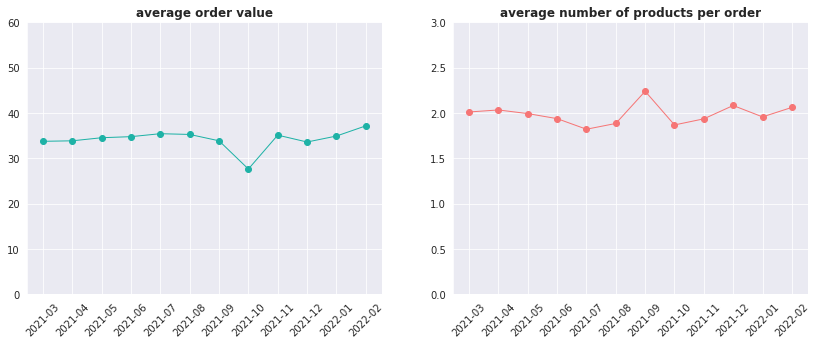

In [31]:
fig_t2, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))

# average order value by month = sales by month / orders by month
average_order_value_month = \
data_transac.groupby(data_transac['date'].dt.to_period('M')).price.sum()/data_transac.groupby(data_transac['date'].dt.to_period('M')).session_id.nunique()

ax1.plot(months, average_order_value_month, linewidth=1, marker="o")   
ax1.set_title('average order value', weight='bold')
ax1.set_ylim(0, 60)

# number of products by order by month
nb_product_order_month = data_transac.groupby(data_transac['date'].dt.to_period('M')).id_prod.count()/data_transac.groupby(\
                                                                                                   data_transac['date'].dt.to_period('M')).session_id.nunique()

ax2.plot(months, nb_product_order_month, linewidth=1, marker="o", color='#f67575')  
ax2.set_title('average number of products per order', weight='bold')
ax2.set_ylim(0, 3)

for ax in (ax1, ax2):
    ax.set_xticks(months)
    ax.set_xticklabels(month_names, rotation = 45)

plt.savefig('data/output_graphics/fig_t2.png', transparent=True)

<h3>A predictable business</h3><a id='stable'></a>

- The average order value remains stable, with a mean of {{round(np.mean(average_order_value_month), 2)}} per order.
- The average number of products per order remains also stable, with a mean of {{round(np.mean(nb_product_order_month), 2)}} products per order.

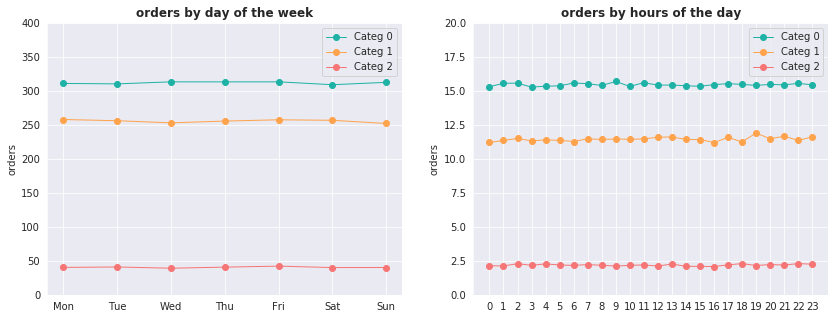

In [32]:
#orders by day of the week and hours of the day
order_day_dict = {}
order_hour_dict = {}
for k in categories: 
        order_day=[]
        order_hour=[]
        for d in range(7): 
            order_d = data_transac.loc[(data_transac['date'].dt.dayofweek==d) & (data_transac['categ']==k)].groupby(\
                                                                                            data_transac['date'].dt.to_period('D')).session_id.nunique().mean()
            order_day.append(float(order_d))
            order_day_dict[k] = order_day
        for h in range(24):
            order_h = data_transac.loc[(data_transac['date'].dt.hour==h) & (data_transac['categ']==k)].groupby(\
                                                                                                       data_transac['date'].dt.to_period('H')).session_id.nunique().mean()
            order_hour.append(float(order_h))
            order_hour_dict[k] = order_hour

dayofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig_t3, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))

[ax1.plot(dayofweek, order_day_dict[k], linewidth=1, marker="o", label='Categ {}'.format(k)) for k in categories]     
ax1.set_title('orders by day of the week', weight='bold')
ax1.set_ylim(0, 400)

[ax2.plot(range(24), order_hour_dict[k], linewidth=1, marker="o", label='Categ {}'.format(k)) for k in categories]     
ax2.set_title('orders by hours of the day', weight='bold')
ax2.set_xticks(range(24))
ax2.set_ylim(0, 20)

for ax in (ax1, ax2):
    ax.set_ylabel('orders')
    ax.legend()

plt.savefig('data/output_graphics/fig_t3.png',transparent=True)

<h3>Uninterrupted orders 7 days a week and 24 hours a day</h3><a id='time'></a>

- The number of orders per day remains constant during the week. Days off (saturday-sunday) or weekdays do not have any influence on the sales.
- And more surprisingly, the number of orders by hour remains constant during the day (there is approximatively the same number of orders at 3am and 11am). 

>**I do not have any solid hypothesis to explain that unsual situation, it needs to be investigated with the bookstore chain management** (international presence with different time zone?).

<a id='correlations'></a>

<hr>

<h2>Section 5 - Correlations</h2>

*Preliminary note*: the below data have been excluded from the bivariate analysis: 
- Top 4 customers - as outliers they do not represent the rest of the dataset ([notes about top 4 customers](#top_customers))
- Customers with an age of 18 - as seen previously this is the default age and gives little indication about the actual age of the customer ([notes about age 18](#age))

In [33]:
data_transac_cor = data_transac.loc[~data_transac.client_id.isin(top4_customers.client_id)]
data_transac_cor = data_transac_cor.loc[data_transac_cor.client_age !=18]

data_customers_cor = data_customers.loc[~data_customers.client_id.isin(top4_customers.client_id)]
data_customers_cor = data_customers_cor.loc[data_customers_cor.client_age !=18]
data_customers_cor = data_customers_cor.loc[data_customers_cor.sales > 0]

In [34]:
# add new age bins based on the pattern (18-30, 31-50, 51+)
data_transac_cor.loc[data_transac_cor.client_age < 31, 'age_bins_tight'] = '19-30'
data_transac_cor.loc[data_transac_cor.client_age.isin(range(31 ,51)), 'age_bins_tight' ] = '31-50'
data_transac_cor.loc[data_transac_cor.client_age > 50, 'age_bins_tight' ] = '51+'

data_customers_cor.loc[data_customers_cor.client_age < 31, 'age_bins_tight'] = '19-30'
data_customers_cor.loc[data_customers_cor.client_age.isin(range(31 ,51)), 'age_bins_tight' ] = '31-50'
data_customers_cor.loc[data_customers_cor.client_age > 50, 'age_bins_tight' ] = '51+'

<hr>

<h4>Men are buying more products of the category 1</h4><a id='c_gender_categ'></a>

Bivariate Analysis - between gender and product categories.

**Hypothesis with Chi-2 test**
* H0 : There is no correlation between gender and category.
* H1 : There is a correlation between gender and category.

In [35]:
X = "categ"
Y = "sex"
c = data_transac_cor[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()
tx = data_transac_cor[X].value_counts()
ty = data_transac_cor[Y].value_counts()
cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data_transac_cor)
cont

sex,f,m,Total
categ,,,
0,100279.0,93323.0,193602.0
1,52359.0,47507.0,99866.0
2,6630.0,6205.0,12835.0
total,159268.0,147035.0,306303.0


In [36]:
c = c.fillna(0)
chi2, pvalue, dof, expected_freq = st.chi2_contingency(c)

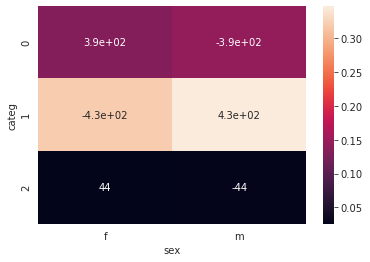

In [37]:
# theoritical contingency table
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(data_transac_cor)
indep = tx.dot(ty.T) / n
indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
indep

#heatmap
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n, annot=indep - c)

plt.savefig('data/output_graphics/fig_cor1.png',transparent=True)

- Chi-2 : {{chi2}}
- Degree of freedom: {{dof}}
- P-value : {{pvalue}} 


>p-value is lower than 5% so we can reject the H0 hypothesis - there is a correlation between gender and category.
> **Men are significantly buying more products from category 2 compared to women.**

<hr>

<h3>Correlations with ages</h3><a id='c_age'></a>

<h4>Preliminary note about the assumptions</h4><a id='c_notes'></a>

There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust-worthy. Assumptions apply to the residuals, not the variables.

- Normality
- Homogeneity of variance (homoscedasticity)
- Independent observations

> Due to the number of observations (much larger than 50) in each group, we can assume that the results of the ANOVA are valid without testing the normality and homoscedasticity.

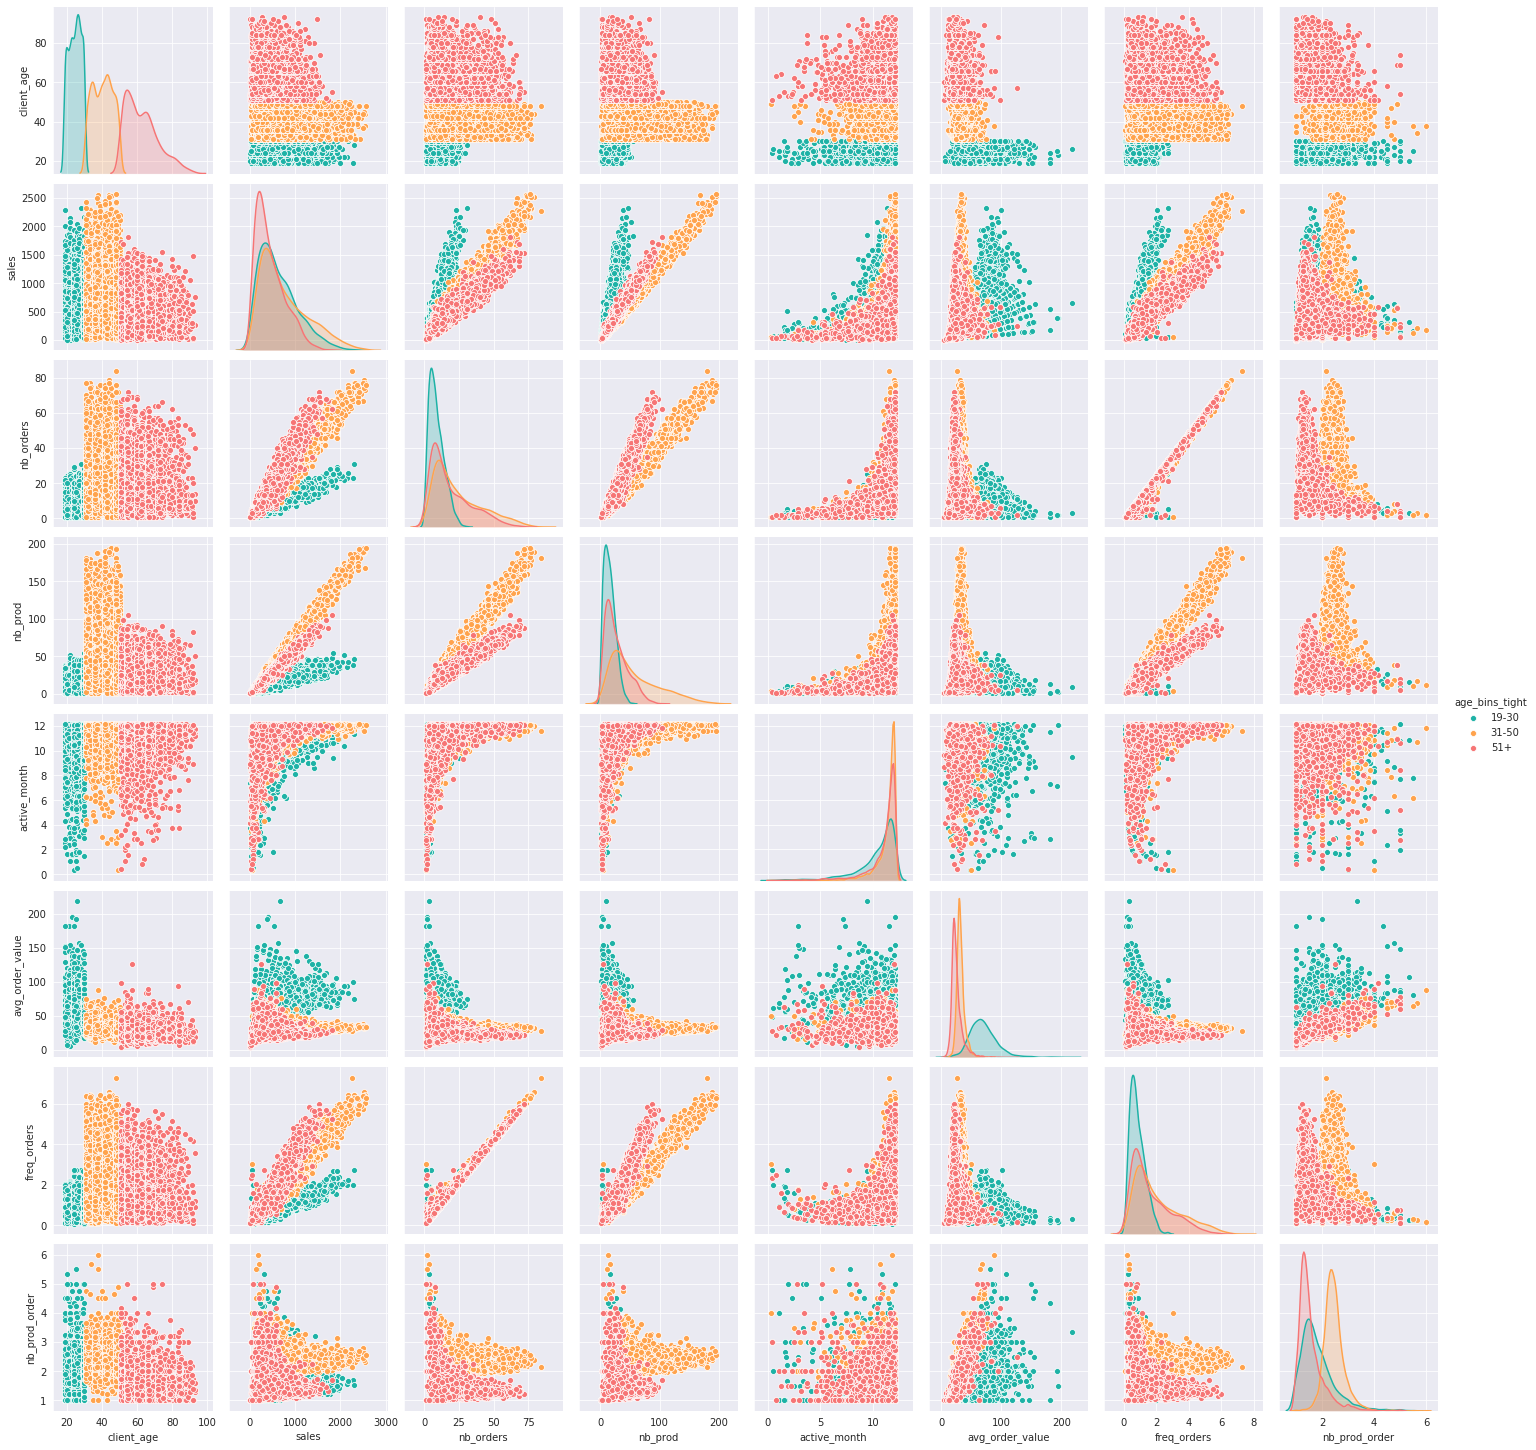

In [38]:
sns.pairplot(data_customers_cor, hue="age_bins_tight")
plt.savefig('data/output_graphics/fig_cor2.png',transparent=True)

<hr>

<h4>Bivariate Bravais-Pearson Correlation between sales and ages not conclusive</h4><a id='c_sales_pearson'></a>

Bivariate Analysis - 2 quantitative variables 2: Sales with Ages - Hypothesis:
* H0 : There is no correlation between ages and sales.
* H1 : There is a correlation between ages and sales.

In [39]:
X = data_customers_cor[['client_age']]
y = data_customers_cor['sales']
X = X.assign(intercept = [1]*X.shape[0])
lr = sm.OLS(y, X).fit()

r_squared = lr.rsquared
pvalue = lr.f_pvalue

print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.039      
Dependent Variable: sales            AIC:                122798.6032
Date:               2020-05-21 18:09 BIC:                122812.6169
No. Observations:   8159             Log-Likelihood:     -61397.    
Df Model:           1                F-statistic:        334.1      
Df Residuals:       8157             Prob (F-statistic): 3.53e-73   
R-squared:          0.039            Scale:              2.0130e+05 
---------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
client_age    -5.5892    0.3058  -18.2781  0.0000   -6.1886   -4.9898
intercept    873.3634   14.6635   59.5603  0.0000  844.6192  902.1076
--------------------------------------------------------------------
Omnibus:             1302.156       Durbin-Watso

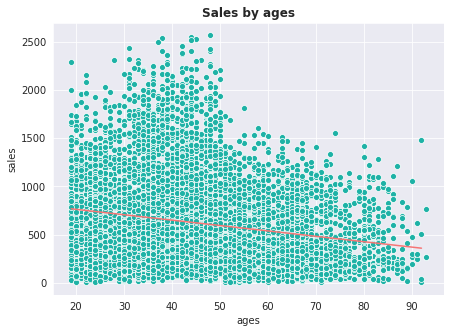

In [40]:
a,b = lr.params['client_age'], lr.params['intercept']

X = data_customers_cor['client_age']
y = data_customers_cor['sales']

plt.figure(figsize=(7, 5))
sns.scatterplot(X, y)
plt.plot(np.arange(min(X), max(X)),[a*x+b for x in np.arange(min(X), max(X))], color='#f67575')
plt.title("Sales by ages", weight='bold')
plt.xlabel("ages")
plt.ylabel("sales")

plt.savefig('data/output_graphics/fig_cor3.png',transparent=True)

- R-squared: {{r_squared}}
- pvalue: {{pvalue}}

>The bivariate analysis between the numerical values 'ages' and 'sales' is not optimal based on the observations. 
<br> we will conduct an ANOVA analysis based on group of ages.


<hr>

<h4>Medium correlation - customers from '31-50' are spending more</h4><a id='c_sales'></a>

Bivariate Analysis - 2 quantitative variables 2: Sales with Age categories - Hypothesis:
* H0 : There is no correlation between age categories and sales.
* H1 : There is a correlation between age categories and sales.

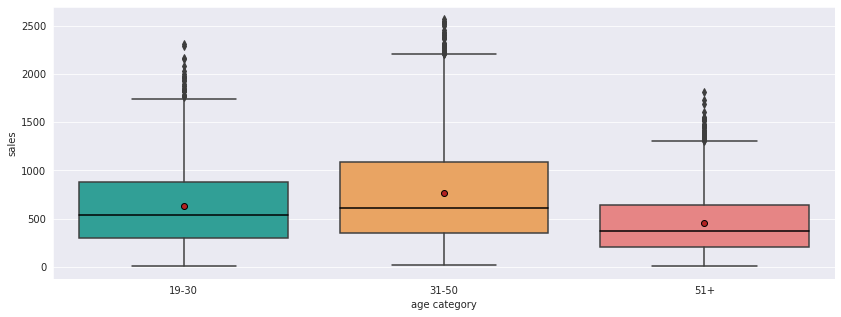

In [41]:
X = 'age_bins_tight'
Y = 'sales'

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

plt.figure(figsize=(14,5))
sns.boxplot(data_customers_cor[X], data_customers_cor[Y], showmeans=True, meanprops=meanprops, medianprops=medianprops);
plt.xlabel('age category')

plt.savefig('data/output_graphics/fig_cor4.png', transparent=True)

In [42]:
linear_model = ols('sales ~C(age_bins_tight)', data=data_customers_cor).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(age_bins_tight),1.526896e+08,2.0,400.018253,1.886401e-166
Residual,1.556599e+09,8156.0,NaN,NaN


In [43]:
# Linear regression
r_squared = linear_model.rsquared
pvalue = linear_model.f_pvalue
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                   OLS                  Adj. R-squared:         0.089      
Dependent Variable:      sales                AIC:                    122364.6418
Date:                    2020-05-21 18:09     BIC:                    122385.6625
No. Observations:        8159                 Log-Likelihood:         -61179.    
Df Model:                2                    F-statistic:            400.0      
Df Residuals:            8156                 Prob (F-statistic):     1.89e-166  
R-squared:               0.089                Scale:                  1.9085e+05 
---------------------------------------------------------------------------------
                             Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------------------
Intercept                   633.6551  10.2151  62.0312 0.0000  613.6309  653.6793
C(age_bins_tight)[T.31-50]  129.5441  12.6912  10.2074 0.0000  104.6661  154.4220
C(age_bins_tight)[T.51+]   -181.3268  12.9891 -13.9599 0.0000 -206.7887 -155.8648
---------------------------------------------------------------------------------
Omnibus:                  1027.227           Durbin-Watson:              2.002   
Prob(Omnibus):            0.000              Jarque-Bera (JB):           1461.551
Skew:                     0.976              Prob(JB):                   0.000   
Kurtosis:                 3.700              Condition No.:              4       
=================================================================================

"""

With a P-value of {{pvalue}} (much lower than 0.05), we can reject the hypothesis 0. 
<br>With a R-squared of {{round(r_squared,3)}}, the correlation is medium.
> There is a **medium correlation between age categories and the sales**. Age categories explained {{round(r_squared*100,2)}}% of the variation in the sales.

In [44]:
mc = MultiComparison(data_customers_cor['sales'], data_customers_cor['age_bins_tight'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
 19-30  31-50  129.5441 0.001   99.7942  159.2939   True
 19-30    51+ -181.3268 0.001  -211.775 -150.8785   True
 31-50    51+ -310.8708 0.001 -336.6655 -285.0761   True
--------------------------------------------------------


<hr>

<h4>Bivariate Bravais-Pearson Correlation between number of orders and ages not conclusive</h4><a id='c_order_pearson'></a>

Bivariate Analysis - 2 quantitative variables 2: Number of orders with Ages - Hypothesis:
* H0 : There is no correlation between ages and number of orders.
* H1 : There is a correlation between ages and number of orders.

In [45]:
X = data_customers_cor[['client_age']]
y = data_customers_cor['freq_orders']
X = X.assign(intercept = [1]*X.shape[0])
lr = sm.OLS(y, X).fit()

r_squared = lr.rsquared
pvalue = lr.f_pvalue

print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.017     
Dependent Variable: freq_orders      AIC:                26836.1242
Date:               2020-05-21 18:09 BIC:                26850.1380
No. Observations:   8159             Log-Likelihood:     -13416.   
Df Model:           1                F-statistic:        139.7     
Df Residuals:       8157             Prob (F-statistic): 5.72e-32  
R-squared:          0.017            Scale:              1.5699    
---------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
client_age     0.0101     0.0009   11.8183   0.0000   0.0084   0.0118
intercept      1.1911     0.0409   29.0874   0.0000   1.1108   1.2714
-------------------------------------------------------------------
Omnibus:              1622.024      Durbin-Watson:      

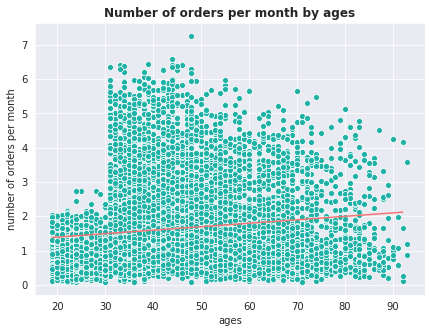

In [46]:
a,b = lr.params['client_age'], lr.params['intercept']

X = data_customers_cor['client_age']
y = data_customers_cor['freq_orders']

plt.figure(figsize=(7, 5))
sns.scatterplot(X, y)
plt.plot(np.arange(min(X), max(X)),[a*x+b for x in np.arange(min(X), max(X))], color='#f67575')
plt.title("Number of orders per month by ages", weight='bold')
plt.xlabel("ages")
plt.ylabel("number of orders per month")

plt.savefig('data/output_graphics/fig_cor5.png',transparent=True)

- R-squared: {{r_squared}}
- pvalue: {{pvalue}}

> The bivariate analysis between the numerical values 'ages' and 'sales' is not optimal based on the observations. 
<br> we will conduct an ANOVA analysis based on group of ages.


<h4>Medium correlation - customers from '31-50' are ordering more often</h4><a id='c_order'></a>

Bivariate Analysis - ANOVA between Age categories (18-30, 31-50, 51+) and frequency of orders - Hypothesis
* H0 : There is no correlation between age categories and the frequency of orders.
* H1 : There is a correlation between age categories and he frequency of orders.

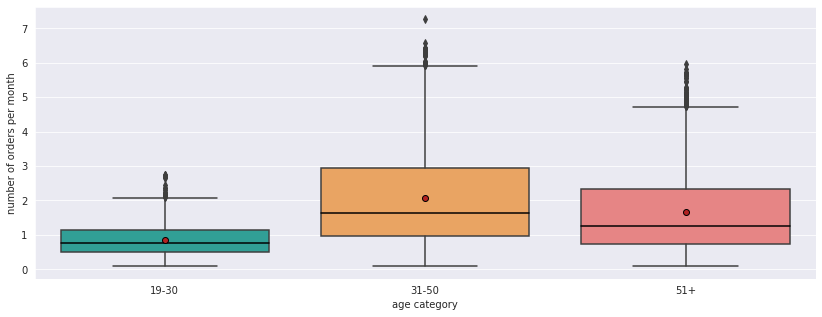

In [47]:
X = 'age_bins_tight'
Y = 'freq_orders'

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

plt.figure(figsize=(14,5))
sns.boxplot(data_customers_cor[X], data_customers_cor[Y], showmeans=True, meanprops=meanprops, medianprops=medianprops);
plt.xlabel('age category')
plt.ylabel('number of orders per month')

plt.savefig('data/output_graphics/fig_cor6.png',transparent=True)

In [48]:
linear_model = ols('freq_orders ~C(age_bins_tight)', data=data_customers_cor).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(age_bins_tight),1787.033859,2.0,648.469357,4.390448e-262
Residual,11238.039240,8156.0,NaN,NaN


In [49]:
# Linear regression
r_squared = linear_model.rsquared
pvalue = linear_model.f_pvalue
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.137     
Dependent Variable:   freq_orders       AIC:                 25772.6102
Date:                 2020-05-21 18:09  BIC:                 25793.6309
No. Observations:     8159              Log-Likelihood:      -12883.   
Df Model:             2                 F-statistic:         648.5     
Df Residuals:         8156              Prob (F-statistic):  4.39e-262 
R-squared:            0.137             Scale:               1.3779    
-----------------------------------------------------------------------
                           Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
-----------------------------------------------------------------------
Intercept                  0.8482   0.0274 30.9014 0.0000 0.7944 0.9020
C(age_bins_tight)[T.31-50] 1.2280   0.0341 36.0120 0.0000 1.1612 1.2949
C(age_bins_tight)[T.51+]   0.8031   0.0349 23.0096 0.0000 0.7346 0.8715
-----------------------------------------------------------------------
Omnibus:              1206.107        Durbin-Watson:           2.007   
Prob(Omnibus):        0.000           Jarque-Bera (JB):        1827.571
Skew:                 1.072           Prob(JB):                0.000   
Kurtosis:             3.882           Condition No.:           4       
=======================================================================

"""

With a P-value of {{pvalue}} (much lower than 0.05), we can reject the hypothesis 0. 
<br>With a R-squared of {{round(r_squared,3)}}, the correlation is medium.
> There is a **medium correlation between age categories and the number orders**. Age categories explained {{round(r_squared*100,2)}}% of the variation in the frequency of orders.


In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data_customers_cor['freq_orders'], data_customers_cor['age_bins_tight'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 19-30  31-50    1.228 0.001  1.1481   1.308   True
 19-30    51+   0.8031 0.001  0.7212  0.8849   True
 31-50    51+   -0.425 0.001 -0.4943 -0.3557   True
---------------------------------------------------


<hr>

<h4>Bivariate Bravais-Pearson Correlation between number of products per order and ages not conclusive</h4><a id='c_prod_pearson'></a>

Bivariate Analysis - 2 quantitative variables 2: Number of products per order with Ages - Hypothesis:
* H0 : There is no correlation between ages and number of product per order.
* H1 : There is a correlation between ages and number of products per orders.

In [51]:
X = data_customers_cor[['client_age']]
y = data_customers_cor['nb_prod_order']
X = X.assign(intercept = [1]*X.shape[0])
lr = sm.OLS(y, X).fit()

r_squared = lr.rsquared
pvalue = lr.f_pvalue

print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.075     
Dependent Variable: nb_prod_order    AIC:                15297.7861
Date:               2020-05-21 18:09 BIC:                15311.7999
No. Observations:   8159             Log-Likelihood:     -7646.9   
Df Model:           1                F-statistic:        661.6     
Df Residuals:       8157             Prob (F-statistic): 2.41e-140 
R-squared:          0.075            Scale:              0.38168   
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
client_age     -0.0108    0.0004  -25.7207  0.0000  -0.0117  -0.0100
intercept       2.4813    0.0202  122.8901  0.0000   2.4417   2.5209
-------------------------------------------------------------------
Omnibus:             706.307       Durbin-Watson:          1.

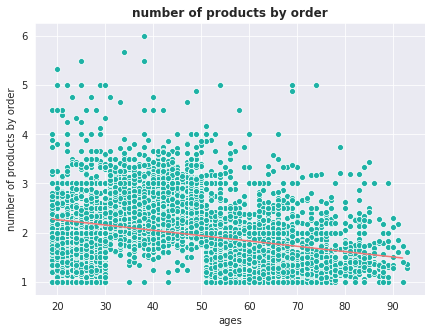

In [52]:
a,b = lr.params['client_age'], lr.params['intercept']

X = data_customers_cor['client_age']
y = data_customers_cor['nb_prod_order']

title = "number of products by order"

plt.figure(figsize=(7, 5))
sns.scatterplot(X, y)
plt.plot(np.arange(min(X), max(X)),[a*x+b for x in np.arange(min(X), max(X))], color='#f67575')
plt.title(title, weight='bold')
plt.xlabel("ages")
plt.ylabel(title)

plt.savefig('data/output_graphics/fig_cor7.png',transparent=True)

- R-squared: {{r_squared}}
- pvalue: {{pvalue}}

> The bivariate analysis between the numerical values 'ages' and 'sales' is not optimal based on the observations. 
<br> we will conduct an ANOVA analysis based on group of ages.


<h4>Strong correlation - customers from '31-50' are purchasing more products per order</h4><a id='c_prod'></a>

Bivariate Analysis - ANOVA between Ages (18-30, 31-50, 51+) and number of products per order - Hypothesis
* H0 : There is no correlation between age categories and the number of products per order.
* H1 : There is a correlation between age categories and the number of products per order.

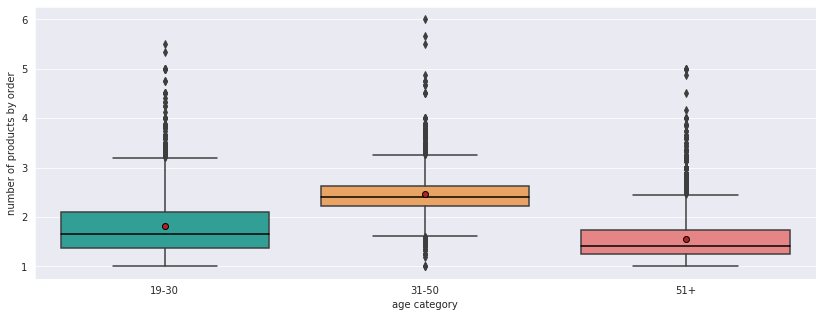

In [53]:
X = 'age_bins_tight'
Y = 'nb_prod_order'

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

plt.figure(figsize=(14,5))
sns.boxplot(data_customers_cor[X], data_customers_cor[Y], showmeans=True, meanprops=meanprops, medianprops=medianprops);
plt.xlabel('age category')
plt.ylabel(title)

plt.savefig('data/output_graphics/fig_cor8.png',transparent=True)

In [54]:
linear_model = ols('nb_prod_order ~C(age_bins_tight)', data=data_customers_cor).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(age_bins_tight),1327.272007,2.0,2655.033373,0.0
Residual,2038.624185,8156.0,NaN,NaN


In [55]:
# Linear regression
r_squared = linear_model.rsquared
pvalue = linear_model.f_pvalue
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.394     
Dependent Variable:     nb_prod_order      AIC:                  11844.9588
Date:                   2020-05-21 18:09   BIC:                  11865.9794
No. Observations:       8159               Log-Likelihood:       -5919.5   
Df Model:               2                  F-statistic:          2655.     
Df Residuals:           8156               Prob (F-statistic):   0.00      
R-squared:              0.394              Scale:                0.24995   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   1.8275   0.0117 156.3249 0.0000  1.8046  1.8504
C(age_bins_tight)[T.31-50]  0.6322   0.0145  43.5298 0.0000  0.6037  0.6607
C(age_bins_tight)[T.51+]   -0.2629   0.0149 -17.6869 0.0000 -0.2921 -0.2338
---------------------------------------------------------------------------
Omnibus:               3343.610         Durbin-Watson:            2.014    
Prob(Omnibus):         0.000            Jarque-Bera (JB):         20326.567
Skew:                  1.863            Prob(JB):                 0.000    
Kurtosis:              9.775            Condition No.:            4        
===========================================================================

"""

With a P-value of {{pvalue}} (much lower than 0.05), we can reject the hypothesis 0. 
<br>With a R-squared of {{round(r_squared,3)}}, the correlation is strong.
> There is a **strong correlation between ages and the number of produtcs per order**. Age categories explained {{round(r_squared*100,2)}}% of the variation in the number of products per order.

**Tukey’s HSD Post-hoc comparison**

In [56]:
mc = MultiComparison(data_customers_cor['nb_prod_order'], data_customers_cor['age_bins_tight'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 19-30  31-50   0.6322 0.001  0.5982  0.6663   True
 19-30    51+  -0.2629 0.001 -0.2978 -0.2281   True
 31-50    51+  -0.8951 0.001 -0.9247 -0.8656   True
---------------------------------------------------


<hr>

<h4>Strong correlation - under 30' customers are buying more expensive products</h4><a id='c_price'></a>

Bivariate Analysis - ANOVA between Ages (18-30, 31-50, 51+) and product prices - Hypothesis
* H0 : There is no correlation between age categories and product prices.
* H1 : There is a correlation between age categories and product prices.

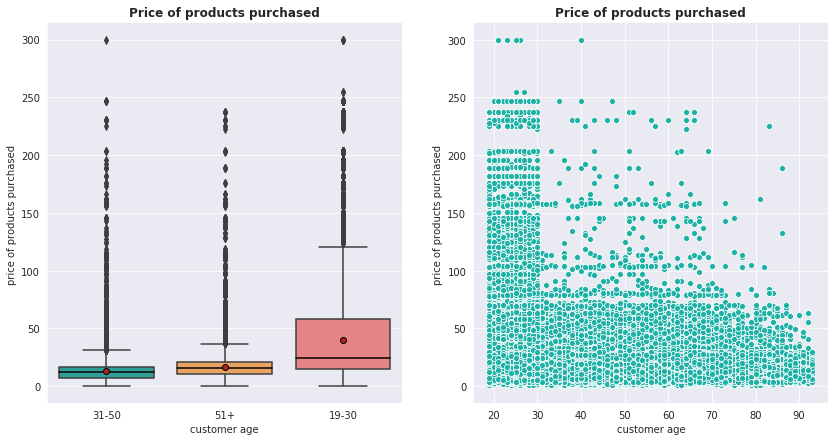

In [57]:
fig_cor9,  (ax1, ax2) = plt.subplots(1,2, figsize = (14, 7))

X = 'age_bins_tight'
Y = 'price'
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
sns.boxplot(data_transac_cor[X],data_transac_cor[Y], showmeans=True, meanprops=meanprops, medianprops=medianprops, ax=ax1);

sns.scatterplot(x='client_age', y=Y, data= data_transac_cor, ax=ax2)

for ax in (ax1, ax2):
    ax.set_title("Price of products purchased", weight='bold')
    ax.set_xlabel('customer age')
    ax.set_ylabel('price of products purchased ')

plt.savefig('data/output_graphics/fig_cor9.png',transparent=True)

In [58]:
linear_model = ols('price ~C(age_bins_tight)', data=data_transac_cor).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(age_bins_tight),1.824446e+07,2.0,43690.654843,0.0
Residual,6.395280e+07,306300.0,NaN,NaN


In [59]:
# Linear regression
r_squared = linear_model.rsquared
pvalue = linear_model.f_pvalue
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS                 Adj. R-squared:        0.222       
Dependent Variable:     price               AIC:                   2505320.3539
Date:                   2020-05-21 18:10    BIC:                   2505352.2509
No. Observations:       306303              Log-Likelihood:        -1.2527e+06 
Df Model:               2                   F-statistic:           4.369e+04   
Df Residuals:           306300              Prob (F-statistic):    0.00        
R-squared:              0.222               Scale:                 208.79      
-------------------------------------------------------------------------------
                            Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------------
Intercept                   39.9364   0.0848  470.8273 0.0000  39.7702  40.1027
C(age_bins_tight)[T.31-50] -26.8619   0.0909 -295.6019 0.0000 -27.0400 -26.6838
C(age_bins_tight)[T.51+]   -23.3499   0.0989 -236.1476 0.0000 -23.5437 -23.1561
-------------------------------------------------------------------------------
Omnibus:                316749.807        Durbin-Watson:           1.803       
Prob(Omnibus):          0.000             Jarque-Bera (JB):        36599703.229
Skew:                   4.982             Prob(JB):                0.000       
Kurtosis:               55.616            Condition No.:           7           
===============================================================================

"""

With a P-value of {{pvalue}} (much lower than 0.05), we can reject the hypothesis 0. 
<br>With a R-squared of {{round(r_squared,3)}}, the correlation is strong.

> There is a strong correlation between ages and the number of produtcs per order. Age categories explained {{round(r_squared*100,2)}}% of the variation in the price of products sold.

**Tukey’s HSD Post-hoc comparison**

In [60]:
mc = MultiComparison(data_transac_cor['price'], data_transac_cor['age_bins_tight'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 19-30  31-50 -26.8619 0.001 -27.0749 -26.6489   True
 19-30    51+ -23.3499 0.001 -23.5816 -23.1182   True
 31-50    51+    3.512 0.001   3.3705   3.6535   True
-----------------------------------------------------


 Post-hoc testing, using Tukey’s HSD Post-hoc comparison, revealed :

- Customers from '19-30' are significantly purchasing products more expensive compared to the customers '31-50'
- Customers from '19-30' are significantly purchasing products more expensive compared to the customers '51+'
- Customers from '51+' are slightly purchasing products more expensive compared to the customers '31-50'

<hr>

<h4>Medium correlation - products of the category 2 are purchased by younger customers</h4><a id='c_ages_categ'></a>

Bivariate Analysis - ANOVA between Ages and categories - Hypothesis
* H0 : There is no correlation between ages and the category.
* H1 : There is a correlation between ages and the category.

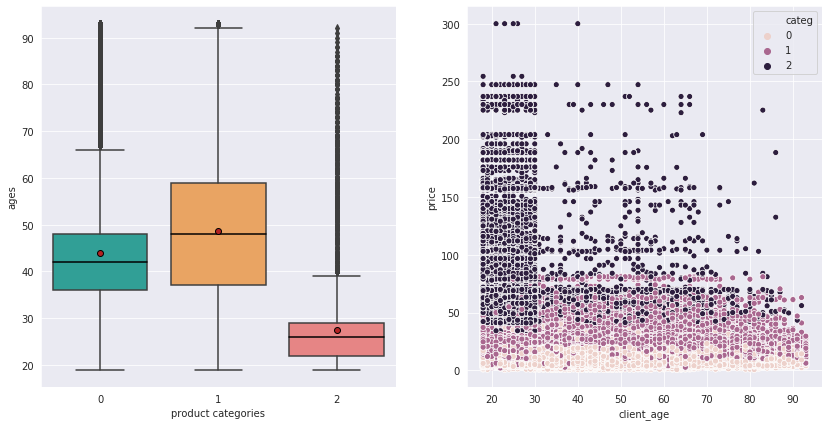

In [61]:
fig_cor10,  (ax1, ax2) = plt.subplots(1,2, figsize = (14, 7))

X = 'categ'
Y = 'client_age'

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

sns.boxplot(data_transac_cor[X],data_transac_cor[Y], showmeans=True, meanprops=meanprops, medianprops=medianprops, ax=ax1);
ax1.set_xlabel('product categories')
ax1.set_ylabel('ages')

sns.scatterplot(x='client_age', y='price', hue='categ', data= data_transac, ax=ax2)

plt.savefig('data/output_graphics/fig_cor10.png',transparent=True)

In [62]:
linear_model = ols('client_age ~C(categ)', data=data_transac_cor).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(categ),5.422069e+06,2.0,16906.727812,0.0
Residual,4.911594e+07,306300.0,NaN,NaN


In [63]:
# Linear regression
r_squared = linear_model.rsquared
pvalue = linear_model.f_pvalue
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.099       
Dependent Variable: client_age       AIC:                2424468.1357
Date:               2020-05-21 18:10 BIC:                2424500.0327
No. Observations:   306303           Log-Likelihood:     -1.2122e+06 
Df Model:           2                F-statistic:        1.691e+04   
Df Residuals:       306300           Prob (F-statistic): 0.00        
R-squared:          0.099            Scale:              160.35      
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept         44.0222   0.0288 1529.6373 0.0000  43.9657  44.0786
C(categ)[T.1]      4.6154   0.0493   93.5518 0.0000   4.5187   4.7121
C(categ)[T.2]    -16.5069   0.1154 -143.0169 0.0000 -16.7331 -16.2807
---------------------------------------------------------------------
Omnibus:              25914.744      Durbin-Watson:         0.227    
Prob(Omnibus):        0.000          Jarque-Bera (JB):      34810.447
Skew:                 0.721          Prob(JB):              0.000    
Kurtosis:             3.805          Condition No.:         5        
=====================================================================

"""

With a P-value of {{pvalue}} (much lower than 0.05), we can reject the hypothesis 0. 
<br>With a R-squared of {{round(r_squared,3)}}, the correlation is medium.

> There is a medium correlation between ages and the number of produtcs per order. Categories explained {{round(r_squared*100,2)}}% of the variation in the client age.

**Tukey’s HSD Post-hoc comparison**

In [64]:
mc = MultiComparison(data_transac_cor['client_age'], data_transac_cor['categ'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1   4.6154 0.001   4.4997    4.731   True
     0      2 -16.5069 0.001 -16.7774 -16.2364   True
     1      2 -21.1223 0.001 -21.4006  -20.844   True
-----------------------------------------------------


 Post-hoc testing, using Tukey’s HSD Post-hoc comparison, revealed :

- Products of category 1 (and to a lower extent category 0) are more purchased by older customers. 
- Products of category 2 are significantly more purchased by younger customers. 

<hr>

<h4>Under 30' are buying more products from category 2</h4><a id='c_age_categ'></a>

Bivariate Analysis - between Ages (18-30, 31-50, 51+) and product categories.

Hypothesis with Chi-2 test:
* H0 : There is no correlation between ages and the products categories.
* H1 : There is a correlation between ages and the product categories.

In [65]:
X = "age_bins_tight"
Y = "categ"
c = data_transac_cor[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()
tx = data_transac_cor[X].value_counts()
ty = data_transac_cor[Y].value_counts()
cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data_transac_cor)
cont

categ,0,1,2,Total
age_bins_tight,,,,
19-30,6681.0,10773.0,11566.0,29020.0
31-50,150974.0,44877.0,574.0,196425.0
51+,35947.0,44216.0,695.0,80858.0
total,193602.0,99866.0,12835.0,306303.0


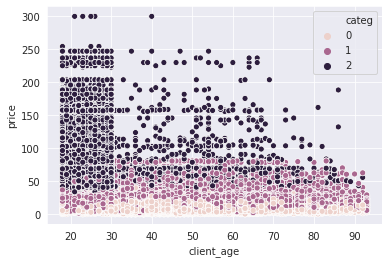

In [66]:
sns.scatterplot(x='client_age', y='price', hue='categ', data= data_transac)
plt.savefig('data/output_graphics/fig_cor11.png',transparent=True)

In [67]:
#replacenull values if any
c = c.fillna(0)

chi2, pvalue, dof, expected_freq = st.chi2_contingency(c)
st.chi2_contingency(c)

(133068.47242487533,
 0.0,
 4,
 array([[ 18342.39312054,   9461.58320356,   1216.0236759 ],
        [124152.46618544,  64041.74640797,   8230.78740659],
        [ 51107.14069402,  26362.67038847,   3388.18891751]]))

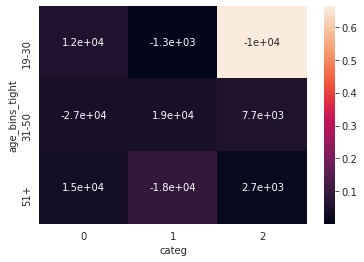

In [68]:
# theoritical contingency table
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(data_transac_cor)
indep = tx.dot(ty.T) / n
indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
indep

#Tableau de contingence coloré (heatmap)
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n, annot=indep - c)

plt.savefig('data/output_graphics/fig_cor12.png',transparent=True)

- Chi-2 : {{chi2}}
- Degree of freedom: {{dof}}
- P-value : {{pvalue}} 

>p-value is lower than 5% so it is safe to accept H1 hypothesis - there is a correlation between gender and category.
<br>There is one significant result: **Under 30' customers are significantly buying more products from category 2 compared to other ages.**